# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Imputer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''


'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=";")

In [3]:
# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=";")

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head(15)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
azdias.shape

(891221, 85)

In [11]:
feat_info.head(85)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [8]:
# Identify missing or unknown data values and convert them to NaNs.


#STUDENT COMMENT:
#The numeric and non-numeric values displayed in feat_info['missing_or_unknown'] respresent the numbers used in the 
#respective categories to designate a NaN. As such, the objective is to identify cells in each of the azdias dataset's
#columns that have been identified in feat_info['missing_or_unknown'] as representing NaN values and to then replace them as
#NaN values.

In [5]:
for _, row in feat_info.iterrows():
    column = azdias[row['attribute']]

    missing_values = row['missing_or_unknown'][1:-1].split(',')
    if missing_values != ['']:
        for mv in missing_values:
            if mv != 'X' and mv != 'XX':
                column.replace(int(mv), np.nan, inplace = True)
            else:
                column.replace(mv, np.nan, inplace = True)

    azdias[row['attribute']] = column

In [6]:
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].apply(lambda x: x.strip('[]').split(','))

for attribute, missing_or_unknown in zip(feat_info['attribute'], feat_info['missing_or_unknown']):
    if missing_or_unknown[0] != '':
        for val in missing_or_unknown:
            if val.isnumeric() or val.lstrip('-').isnumeric():
                azdias.loc[azdias[attribute] == int(val), attribute] = np.nan
            else:
                azdias.loc[azdias[attribute] == val, attribute] = np.nan

In [7]:
azdias.to_csv('azdias_NaN_adjusted.csv', sep=';', index = False)

In [8]:
azdias_2 = pd.read_csv('azdias_NaN_adjusted.csv', delimiter=';')

In [16]:
azdias_2['CAMEO_DEU_2015']

0         NaN
1          8A
2          4C
3          2A
4          6B
5          8C
6          4A
7          2D
8          1A
9          1E
10         9D
11        NaN
12         6B
13         5C
14        NaN
15         8B
16         7A
17        NaN
18         4C
19         5D
20         4C
21         9E
22         9D
23         6B
24        NaN
25         5C
26        NaN
27         9B
28         1A
29         2A
         ... 
891191     6C
891192     5B
891193     6B
891194     4C
891195     8D
891196     4B
891197     3C
891198     2C
891199     8A
891200     9A
891201     7A
891202     8B
891203     3D
891204     3C
891205     5E
891206     3D
891207     7A
891208     2C
891209     8A
891210     8B
891211     9D
891212     9D
891213     5E
891214     3A
891215     5A
891216     7A
891217     9D
891218     4C
891219     9D
891220     6B
Name: CAMEO_DEU_2015, Length: 891221, dtype: object

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [9]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
nan_count_columns=azdias_2.isnull().sum(axis=0)

In [10]:
nan_count_columns.describe()

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

In [ ]:
# STUDENT ANSWER:
# Initial observation on missing NaN columns values: On average, columns have 11% (mean / length) Nan.  Some columns have all of their entries while
# others are missing up to 99.7% of data. That being said, the 75th quartile is only missing 13% of its data, which
# leads one to be believe that there are a few outliers that need to be removed.

In [11]:
nan_count_columns.sort_values(inplace=True, ascending=False)

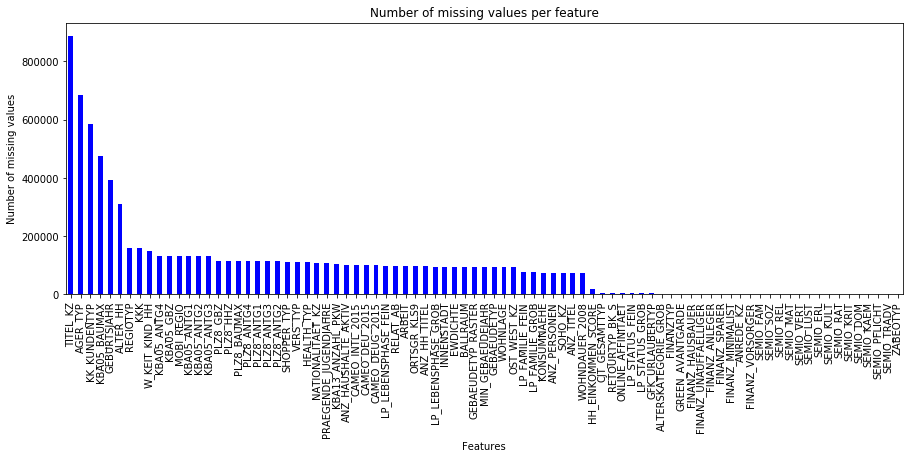

In [12]:
# Investigate patterns in the amount of missing data in each column.
# visualising bar chart of missing columns values
nan_count_columns.plot.bar(figsize=(15,5), facecolor='b')
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Number of missing values per feature')
plt.show()


In [13]:
# STUDENT ANSWER
# From the bar chart above, we can see that there are almost step-like increases in number of missing data from one
# feature to the next. Specifically, looking at the chart from right to left, features go from having zero or close
# to zero missing features to having between 100k and 150k missing features. Then, there is a sudden leap above 200k
# in number of missing features. 
# From this observation, a preliminary decision of removing data with more than 200k missing features has been taken.
nan_count_columns

TITEL_KZ                 889061
AGER_TYP                 685843
KK_KUNDENTYP             584612
KBA05_BAUMAX             476524
GEBURTSJAHR              392318
ALTER_HH                 310267
REGIOTYP                 158064
KKK                      158064
W_KEIT_KIND_HH           147988
KBA05_ANTG4              133324
KBA05_GBZ                133324
MOBI_REGIO               133324
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
PLZ8_GBZ                 116515
PLZ8_HHZ                 116515
PLZ8_BAUMAX              116515
PLZ8_ANTG4               116515
PLZ8_ANTG1               116515
PLZ8_ANTG3               116515
PLZ8_ANTG2               116515
SHOPPER_TYP              111196
VERS_TYP                 111196
HEALTH_TYP               111196
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
KBA13_ANZAHL_PKW         105800
ANZ_HAUSHALTE_AKTIV       99611
CAMEO_INTL_2015           99352
                          ...  
RETOURTY

In [14]:
# Another version of azdias will be created. It will be called "azdias_clean"
azdias_clean = azdias_2.copy()
azdias_clean.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [15]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

outliers_columns = nan_count_columns[nan_count_columns> 200000].index


azdias_clean.drop(outliers_columns, axis=1, inplace=True)


In [16]:
#checking that outliers have been removed from azdias_clean database
print(outliers_columns)
azdias_clean.columns

Index(['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR',
       'ALTER_HH'],
      dtype='object')


Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [17]:
# How much data is missing in each row of the dataset?
nan_count_rows=azdias.isnull().sum(axis=1)

nan_count_rows.describe()

count    891221.000000
mean          9.396018
std          13.971829
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          54.000000
dtype: float64

In [ ]:
# STUDENT ANSWER:
# Initial observation on missing NaN row values: On average, each entry will be missing values for 9 out of its 85
# features and the median is 4. Rather low in general. The maximum number of missing features is 54, which seems rather
# high.

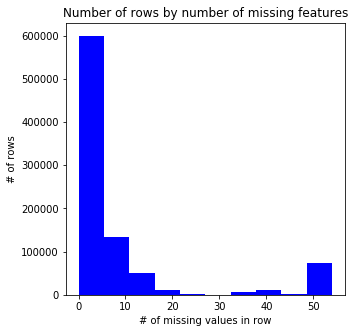

In [18]:
nan_count_rows.sort_values(inplace=True, ascending=False)

nan_count_rows.plot.hist(figsize=(5,5), facecolor='b')
plt.xlabel('# of missing values in row')
plt.ylabel('# of rows')
plt.title('Number of rows by number of missing features')
plt.show()


In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
threshold = 20
above_th_index = nan_count_rows[nan_count_rows> threshold].index
within_th_index = nan_count_rows[nan_count_rows <= threshold].index

In [20]:
above_th = azdias_clean.iloc[above_th_index]
within_th = azdias_clean.iloc[within_th_index]

In [21]:
within_th.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
596791,1.0,2.0,3.0,1.0,4.0,3.0,5.0,5.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0
471026,1.0,2.0,6.0,1.0,4.0,2.0,2.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0,5.0
1037,2.0,2.0,3.0,3.0,4.0,2.0,4.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,3.0
471025,3.0,2.0,6.0,3.0,4.0,2.0,4.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0
687543,2.0,2.0,6.0,4.0,5.0,2.0,4.0,5.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0


In [22]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
def comparison_function (df1, df2, feature):
    fig, ax =plt.subplots(1,2)
    sns.countplot(df1[feature], ax=ax[0])
    sns.countplot(df2[feature], ax=ax[1])
    plt.subplots_adjust(wspace= 1)
    fig.show()
    return

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


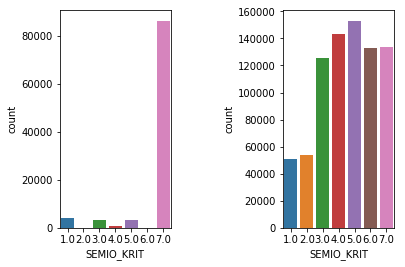

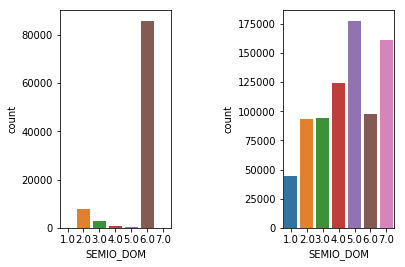

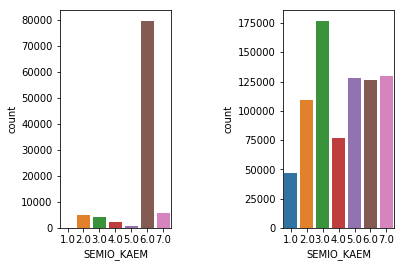

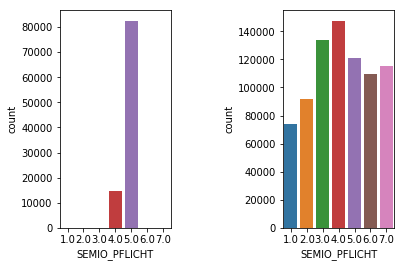

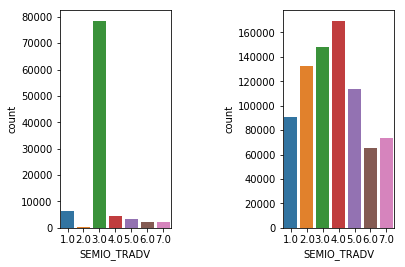

In [23]:
#list of features with no missing values
features = ['SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV']

for feat in features:
    comparison_function(above_th, within_th, feat)

#### Discussion 1.1.3: Assess Missing Data in Each Row

STUDENT ANSWER: 

We first define a threshold of 20 missing features to seperate our dataset into two groups. We then identify columns with no missing features to see how the reported values for these features, when plotted for both of the aforementioned groups, could be potentially different. From the plots above, the charts on the left represent how the features are plotted in the group of data that crossed the threshold. The charts on the right represent features' distribution with the group of data that remaind within the error threshold. We can easily see that the charts on the left are very different from those on the right. More specifically, the data on the right shows nicely distributed, sometimes even Gaussian-like distributions. Whereas the plots on the left are very uneven, often times with frequency spikes for certain values.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [24]:
# How many features are there of each data type?
# ANSWER: Please see result below
feat_info['type'].value_counts()


ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [25]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical_vars = feat_info.loc[feat_info['type'] == 'categorical', 'attribute'].values
categorical_vars = [categorical_vars for categorical_vars in categorical_vars if categorical_vars in azdias_clean.columns] 


In [26]:
binary = [x for x in categorical_vars if azdias_clean[x].nunique()==2]
multilevel = [x for x in categorical_vars if azdias_clean[x].nunique()>2]


In [27]:
azdias_clean[categorical_vars].nunique()

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

In [28]:
reencode_values = {'W': 0, 'O': 1}
azdias_clean = azdias_clean.replace({'OST_WEST_KZ':reencode_values})

In [29]:
azdias_clean.drop(multilevel,axis='columns', inplace=True)

In [30]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Making sure categorical variables identified in the feat_info are also present in the cleaned version of azdias
# Note: azdias_clean has only been adjusted for features missing values, not for rows missing values. The project does
# not explicitly ask the student to remove rows that have many missing values.

categorical_vars = [categorical_vars for categorical_vars in categorical_vars if categorical_vars in azdias_clean.columns] 

categorical_vars


['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [31]:
azdias_clean[categorical_vars].nunique()

ANREDE_KZ           2
GREEN_AVANTGARDE    2
SOHO_KZ             2
VERS_TYP            2
OST_WEST_KZ         2
dtype: int64

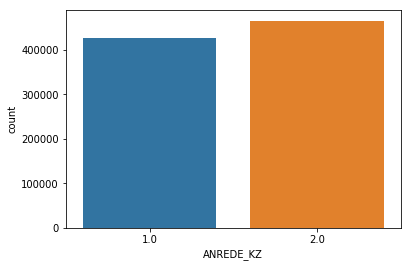

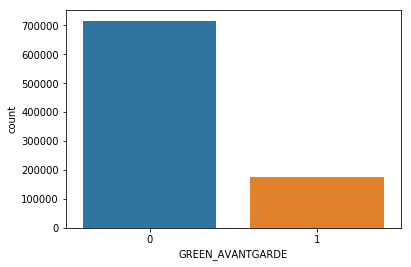

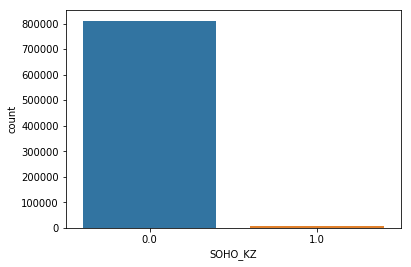

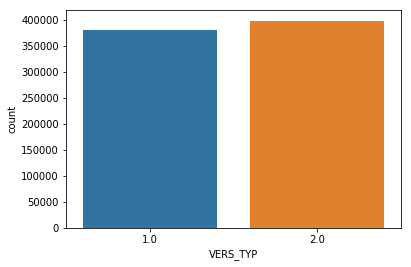

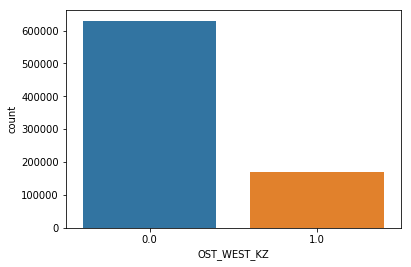

In [32]:
for feat in categorical_vars:
    fig, ax =plt.subplots(1,1)
    sns.countplot(azdias_clean[feat])

In [33]:
dum_df = pd.get_dummies(azdias_clean, columns=categorical_vars)


#### Discussion 1.2.1: Re-Encode Categorical Features

STUDENT ANSWER:
After plotting the multi-level categoricals, they seem, for the most part, well distributed in terms of their
frequency of occurence. The only cateogrical that seems off is "GEBAEUDETYP". "CAMEO_DEU_2015" also seems 
like it may add too much noise / variables to the dataset. That being said, I plan on keeping all of the variables
because a) I don't know how much variance in the dataset they may explain and b) My PCA will help me discard them
in a future iteration if they are not of value.

The main engineering step that I took was to turn all of the non-categorical columns into dummy variables.

In [34]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
dum_df['PRAEGENDE_JUGENDJAHRE']

0          NaN
1         14.0
2         15.0
3          8.0
4          8.0
5          3.0
6         10.0
7          8.0
8         11.0
9         15.0
10         3.0
11         NaN
12         8.0
13        15.0
14         NaN
15         5.0
16        14.0
17         NaN
18        10.0
19         9.0
20        11.0
21        10.0
22        14.0
23         9.0
24         NaN
25        14.0
26         8.0
27        11.0
28        10.0
29         6.0
          ... 
891191     3.0
891192    14.0
891193     5.0
891194    11.0
891195     8.0
891196    14.0
891197    11.0
891198    15.0
891199    10.0
891200    14.0
891201    10.0
891202    10.0
891203     NaN
891204    10.0
891205     3.0
891206    14.0
891207     2.0
891208     8.0
891209    14.0
891210     8.0
891211     8.0
891212     3.0
891213    11.0
891214    14.0
891215    10.0
891216    14.0
891217    10.0
891218    14.0
891219    14.0
891220     3.0
Name: PRAEGENDE_JUGENDJAHRE, Length: 891221, dtype: float64

In [35]:
movement = {1: [40,0],
            2: [40,1],
            3: [50,0],
            4: [50,1],
            5: [60,0],
            6: [60,1],
            7: [60,1],
            8: [70,0],
            9: [70,1],
            10: [80,0],
            11: [80,1],
            12: [80,0],
            13: [80,1],
            14: [90,0],
            15: [90,1],
            np.nan: [np.nan, np.nan]}

In [36]:
dum_df['GENERATION'] = dum_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else movement[x][0])


dum_df['MOVEMENT'] = dum_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else movement[x][1])


# No need in keeping original column if we have just finished segmenting it into its sub-dimensions
dum_df.drop('PRAEGENDE_JUGENDJAHRE', axis='columns', inplace=True)


In [37]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
dum_df['CAMEO_INTL_2015_Social_class'] = [np.nan if np.isnan(row) else str(row)[0] for row in dum_df['CAMEO_INTL_2015']]
dum_df['CAMEO_INTL_2015_Life_stage'] = [np.nan if np.isnan(row) else str(row)[1] for row in dum_df['CAMEO_INTL_2015']]

dum_df.drop('CAMEO_INTL_2015', axis='columns', inplace=True)

In [38]:
mixed_vars = feat_info.loc[feat_info['type'] == 'mixed', 'attribute'].values
mixed_vars = [mixed_vars for mixed_vars in mixed_vars if mixed_vars in dum_df.columns]

dum_df[mixed_vars].nunique()

LP_LEBENSPHASE_FEIN    40
LP_LEBENSPHASE_GROB    12
WOHNLAGE                8
PLZ8_BAUMAX             5
dtype: int64

In [39]:
dum_df.drop(mixed_vars, axis='columns', inplace=True)


#### Discussion 1.2.2: Engineer Mixed-Type Features

STUDENT ANSWER:
After analyzing and treating mixed features 'PRAEGENDE_JUGENDJAHRE' and 'CAMEO_INTL_2015', I realized that the remaining mixed-features (ie., 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX') represented social and economic concepts that seem to be highly related to the first two mentioned features. Additionally, 'LP_LEBENSPHASE_FEIN' has 40 different values, which would add too much granularity to the dataset.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [ ]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [ ]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [40]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=";")
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    df1 = df.copy()
    
    # Removing X and XX
    for _, row in feat_info.iterrows():
        column = df1[row['attribute']]

        missing_values = row['missing_or_unknown'][1:-1].split(',')
        if missing_values != ['']:
            for mv in missing_values:
                if mv != 'X' and mv != 'XX':
                    column.replace(int(mv), np.nan, inplace = True)
                else:
                    column.replace(mv, np.nan, inplace = True)
        df1[row['attribute']] = column

    # Removing all other types of non-numericals
    for attribute in feat_info['attribute']:
        nan_list = feat_info[feat_info['attribute']==attribute].missing_or_unknown.iloc[0].replace('[','').replace(']','').split(',')
        missing_or_unknown_list = [float(x) if x.lstrip('-').isnumeric() else x for x in nan_list]
        df1[attribute].replace(to_replace=missing_or_unknown_list, value=np.nan, inplace=True)
    
    # remove selected columns and rows, ...
    # removing columns
    nan_count_columns=df1.isnull().sum(axis=0)
    
    outliers_columns = nan_count_columns[nan_count_columns> 200000].index
    df1.drop(outliers_columns, axis=1, inplace=True)
    
    # removing rows
    nan_count_rows=df1.isnull().sum(axis=1)
    
    threshold = 25
    above_th_index = nan_count_rows[nan_count_rows> threshold].index
    within_th_index = nan_count_rows[nan_count_rows <= threshold].index
    
    df1.drop(above_th_index, axis=0, inplace=True)
        
    # select, re-encode, and engineer column values.
    # sub-action: Fixing categorical variables
    categorical_vars = feat_info.loc[feat_info['type'] == 'categorical', 'attribute'].values
    categorical_vars = [categorical_vars for categorical_vars in categorical_vars if categorical_vars in df1.columns]
    
    binary = [x for x in categorical_vars if df1[x].nunique()==2]
    multilevel = [x for x in categorical_vars if df1[x].nunique()>2]
    df1.OST_WEST_KZ = df1.OST_WEST_KZ.replace ({'O': 0.0,'W': 1.0}) 
    
    df1.drop(multilevel, axis=1, inplace=True)
    print(multilevel)
        
    # sub-action: Fixing mixed variables
    movement = {1: [40,0], 2: [40,1], 3: [50,0], 4: [50,1], 5: [60,0], 6: [60,1], 7: [60,1], 8: [70,0], 9: [70,1], 10: [80,0], 11: [80,1], 12: [80,0], 13: [80,1], 14: [90,0], 15: [90,1], np.nan: [np.nan, np.nan]}
    
    df1['GENERATION'] = df1['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else movement[x][0])
    df1['MOVEMENT'] = df1['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else movement[x][1])
    df1.drop('PRAEGENDE_JUGENDJAHRE', axis='columns', inplace=True)
    
    df1['CAMEO_INTL_2015_Social_class'] = df['CAMEO_INTL_2015'].str[0]
    df1['CAMEO_INTL_2015_Social_class'] = pd.to_numeric(df1['CAMEO_INTL_2015_Social_class'], errors='coerce')
    
    df1['CAMEO_INTL_2015_Life_stage'] = df['CAMEO_INTL_2015'].str[1]
    df1['CAMEO_INTL_2015_Life_stage'] = pd.to_numeric(df1['CAMEO_INTL_2015_Life_stage'], errors='coerce')
    
    df1.drop('CAMEO_INTL_2015', axis=1, inplace=True)
    
    mixed_vars = feat_info.loc[feat_info['type'] == 'mixed', 'attribute'].values
    mixed_vars = [mixed_vars for mixed_vars in mixed_vars if mixed_vars in df1.columns]
    df1.drop(mixed_vars, axis=1, inplace=True)
    
    # Return the cleaned dataframe.
    return df1
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [41]:
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=";")

In [42]:
new_df = clean_data(azdias)

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [43]:
new_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,GENERATION,MOVEMENT,CAMEO_INTL_2015_Social_class,CAMEO_INTL_2015_Life_stage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,90.0,0.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,90.0,1.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0.0,3.0,4.0,2.0,3.0,3.0,70.0,0.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,1.0,3.0,3.0,4.0,6.0,5.0,70.0,0.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,50.0,0.0,5.0,4.0


In [44]:
#the imputer said that some of my columns/features were comprised of objects, so I needed to identify here
#and then fix it in the function
new_df.dtypes

ALTERSKATEGORIE_GROB            float64
ANREDE_KZ                         int64
FINANZ_MINIMALIST                 int64
FINANZ_SPARER                     int64
FINANZ_VORSORGER                  int64
FINANZ_ANLEGER                    int64
FINANZ_UNAUFFAELLIGER             int64
FINANZ_HAUSBAUER                  int64
GREEN_AVANTGARDE                  int64
HEALTH_TYP                      float64
RETOURTYP_BK_S                  float64
SEMIO_SOZ                         int64
SEMIO_FAM                         int64
SEMIO_REL                         int64
SEMIO_MAT                         int64
SEMIO_VERT                        int64
SEMIO_LUST                        int64
SEMIO_ERL                         int64
SEMIO_KULT                        int64
SEMIO_RAT                         int64
SEMIO_KRIT                        int64
SEMIO_DOM                         int64
SEMIO_KAEM                        int64
SEMIO_PFLICHT                     int64
SEMIO_TRADV                       int64


In [45]:
new_df.shape

(797961, 64)

In [46]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
imp = Imputer()


In [47]:
imp_df = imp.fit_transform(new_df)


In [48]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()



In [49]:
scaled_imp_df = scaler.fit_transform(imp_df)

In [50]:
pd.DataFrame(scaled_imp_df).to_csv('azdias_scaled_and_imputed.csv', sep=';', index = False, header = new_df.columns)

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [51]:
scaled_imp_data = pd.read_csv('azdias_scaled_and_imputed.csv', delimiter=';')

In [52]:
scaled_imp_data.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT',
       'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_HHZ', 'PLZ8_GBZ',
       'ARBEI

In [53]:
# Apply PCA to the data.
pca = PCA()
X_pca = pca.fit_transform(scaled_imp_data)


In [54]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    



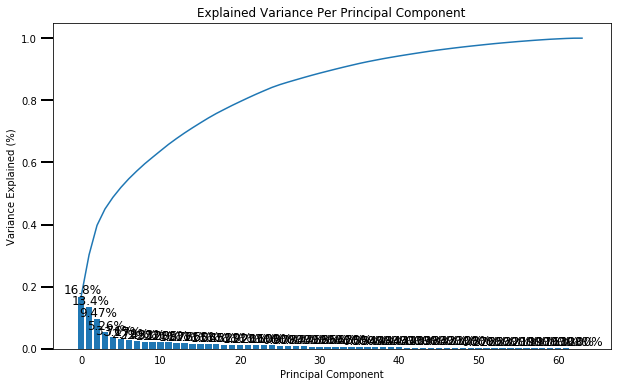

In [55]:
scree_plot(pca)

In [ ]:
# Re-apply PCA to the data while selecting for number of components to retain.
'''
STUDENT ANSWER:
From the plot above, it can be observed that almost 50% of the dataset's variance can be explained by five of its features.
Thereafter, the remaining variables explain for only a marginal portion of the data, with very small differences from one
to the next. The two largest drops after the first 5 components, where drop is considered as a the change of percentage of 
variance explained from one feature to the next, happens going from the 28th to the 29th component, and then from the 40th 
to the 41st component. Given that the cleaned dataset has 65 features in total, it seems reasonable to keep the first 40 
components. Reducing to the 28th component just seems a bit excessive, especially given that the dataset originally had 85
features, and some of these features were multi-level features with at times as many as 40 different types of inputs.
'''


In [56]:
pca_40 = PCA(n_components = 40)
X_pca_40 = pca_40.fit_transform(scaled_imp_data)

In [57]:
X_pca_40.shape

(797961, 40)

In [58]:
scaled_imp_data.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT',
       'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_HHZ', 'PLZ8_GBZ',
       'ARBEI

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [59]:
pca_40.components_.shape

(40, 64)

In [60]:
len(pca_40.components_[0])

64

In [61]:
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def pca_weights(pca, component):
    df = pd.DataFrame(pca.components_, columns=scaled_imp_data.columns)
    weights = df.iloc[component]
    print("***Most positive features***")
    print(weights.sort_values(ascending=False).head(5))
    print("***Most negative features***")
    print(weights.sort_values(ascending=True).head(5))
    

The features with the strongest associations in each component will be the ones with the largest features. Two features with the same sign are positively associated: when one feature moves in a direction, then the other feature will be expected to move in that same direction. Two features with opposite signs are negatively associated: when one feature moves in a direction, the other feature will be expected to move in the opposite direction.

In [62]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(pca_40, 0)

***Most positive features***
PLZ8_ANTG3                      0.227752
PLZ8_ANTG4                      0.220937
CAMEO_INTL_2015_Social_class    0.208192
HH_EINKOMMEN_SCORE              0.204419
ORTSGR_KLS9                     0.198453
Name: 0, dtype: float64
***Most negative features***
MOBI_REGIO          -0.243174
PLZ8_ANTG1          -0.227404
KBA05_ANTG1         -0.226662
FINANZ_MINIMALIST   -0.218343
KBA05_GBZ           -0.218191
Name: 0, dtype: float64


In the first component, we see that it's variablity is positively associated by the # of large households, size of the community, and social class / household income. The variance explained by this feature is negatively associated to movement patterns within a community, number of small households, number of buildings (buildings likely have smaller living spaces and therefore smaller households) and financial minimalism.

In [63]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_weights(pca_40, 1)

***Most positive features***
ALTERSKATEGORIE_GROB    0.261395
FINANZ_VORSORGER        0.234438
SEMIO_ERL               0.231109
SEMIO_LUST              0.184344
RETOURTYP_BK_S          0.163816
Name: 1, dtype: float64
***Most negative features***
SEMIO_REL       -0.255669
GENERATION      -0.252526
FINANZ_SPARER   -0.237588
SEMIO_TRADV     -0.232325
SEMIO_PFLICHT   -0.229048
Name: 1, dtype: float64


In the second component, the variance that it explains is positively associated by age (the older, the more positive), financial planning, and personality typology relating to people's affinity for events and sensuality(the less affinity, the more positive, implying a grouping for more conservative people). Meanwhile, the variance is negatively associated with lack of religious mindedness, younger generations, and high spenders/untraditional people. 

In [64]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(pca_40, 2)

***Most positive features***
SEMIO_VERT           0.345256
SEMIO_SOZ            0.262513
SEMIO_FAM            0.250182
SEMIO_KULT           0.235627
FINANZ_MINIMALIST    0.155892
Name: 2, dtype: float64
***Most negative features***
ANREDE_KZ    -0.368738
SEMIO_KAEM   -0.337105
SEMIO_DOM    -0.314327
SEMIO_KRIT   -0.276155
SEMIO_RAT    -0.217508
Name: 2, dtype: float64


In [65]:
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,GENERATION,MOVEMENT,CAMEO_INTL_2015_Social_class,CAMEO_INTL_2015_Life_stage
Dimension 1,0.1681,-0.1154,0.0084,-0.2183,0.1426,-0.1102,0.0661,0.0700,0.1635,-0.1094,...,0.2209,0.0418,-0.1687,0.1445,0.1985,0.1364,0.0974,-0.1071,0.2082,-0.1254
Dimension 2,0.1345,0.2614,0.0896,0.0694,-0.2376,0.2344,-0.2053,-0.2286,0.1152,-0.0141,...,0.0846,0.0120,-0.0684,0.0650,0.0866,0.0625,-0.2525,-0.0121,0.0713,0.0037
Dimension 3,0.0948,0.0787,-0.3687,0.1559,-0.1061,0.1009,-0.1888,-0.0996,-0.0420,0.0470,...,0.0449,0.0039,-0.0381,0.0346,0.0459,0.0315,-0.1075,0.0450,0.0274,-0.0087
Dimension 4,0.0526,-0.0419,0.0354,0.0652,-0.0036,-0.0170,-0.1251,0.0817,-0.1068,0.4000,...,0.0839,0.1405,0.0351,0.0548,0.2506,0.0968,0.0386,0.3993,-0.1234,0.0576
Dimension 5,0.0376,-0.0011,0.0068,0.0862,-0.0068,-0.0605,0.0362,-0.0472,-0.0854,0.0601,...,0.0139,-0.4959,-0.4052,0.2187,0.0918,0.1508,0.0291,0.0559,-0.0082,0.0263
Dimension 6,0.0318,0.0007,0.0174,-0.0267,0.0042,-0.0340,0.0189,-0.0234,0.0294,0.0100,...,0.0869,-0.0460,-0.0926,-0.1705,-0.0772,-0.2067,0.0129,0.0132,-0.0719,0.0580
Dimension 7,0.0280,0.0276,-0.0579,0.0533,0.0544,-0.0148,0.0736,0.0393,-0.1808,-0.0186,...,0.0500,0.2083,0.1216,0.0057,0.1105,0.0197,0.0999,-0.0214,0.0180,-0.0720
Dimension 8,0.0249,-0.1568,0.0242,0.0459,-0.0926,0.1415,-0.1183,-0.0639,0.0349,-0.0238,...,-0.1088,-0.0671,0.0369,-0.0039,0.1057,0.0372,-0.1302,-0.0211,-0.0568,0.0455
Dimension 9,0.0233,0.0078,0.0934,0.0757,-0.1211,0.0790,-0.0430,-0.1129,0.0174,-0.0141,...,0.0454,0.1511,0.0777,0.1355,0.0564,0.0578,-0.1305,-0.0128,0.0145,0.0298
Dimension 10,0.0212,-0.0347,0.0081,-0.1001,0.0582,-0.1132,0.1514,-0.0768,0.2470,0.1057,...,-0.0117,0.2097,0.1689,0.4368,0.0421,0.2228,0.0087,0.1067,-0.0138,0.2195


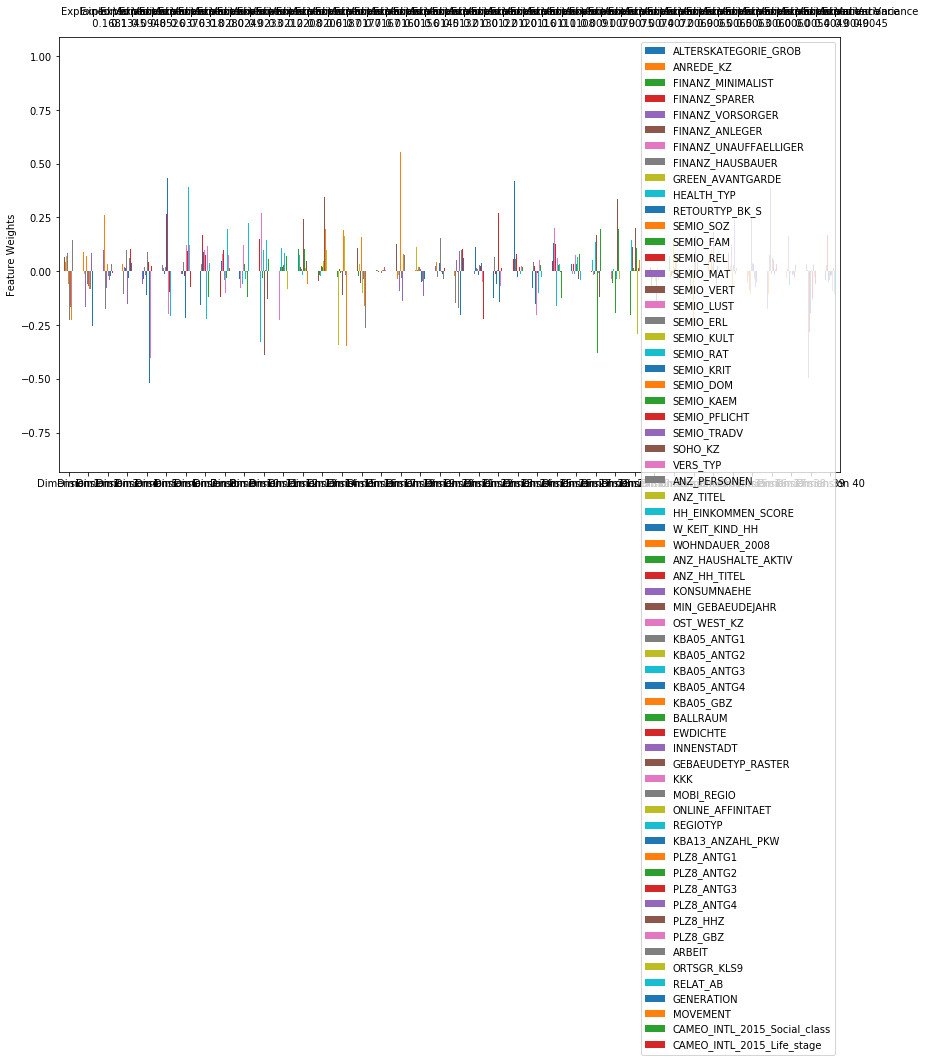

In [66]:
pca_results(scaled_imp_data, pca_40)

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [67]:
# Over a number of different cluster counts...
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.
    
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
        
    return score



In [68]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
scores = []
centers = list(range(1,21))

for center in centers:
    score = get_kmeans_score(X_pca_40, center)
    scores.append(score)
    print(center)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


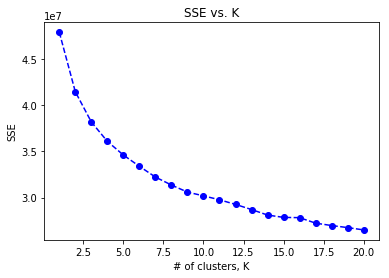

In [69]:
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
#plt.plot(centers, wcss, linestyle='--', marker='o', color='g');
plt.xlabel('# of clusters, K');
plt.ylabel('SSE');
plt.title('SSE vs. K');    


In [72]:
for i in list(range(1,20)):
    diff = scores[i]-scores[i-1]
    perc_change = diff / scores[i-1]
    print(i+1, perc_change)

2 -0.134622503568
3 -0.0790290892853
4 -0.0550344255713
5 -0.04101681137
6 -0.0353725749856
7 -0.0349117720226
8 -0.0268123191686
9 -0.024482668132
10 -0.013171362908
11 -0.0142495153235
12 -0.0168140327842
13 -0.019022586932
14 -0.0208160638721
15 -0.00902027311065
16 -0.00110003192413
17 -0.0213473066339
18 -0.00954362489091
19 -0.00826042309918
20 -0.00940522296639


In [73]:
# STUDENT ANSWER:
# This elbow is not at all evident. Also, my CPU is having a tough time generating higher KMeans clusters (20 and beyond)
# takes forever to run!). I am having internal conflict regarding which is the correct number of clusters because the slope
# of the curve is not continuously flattening. There are moments where it seems to flatten but then regains a negative slope.
# Such behaviour can be observed from f(centroids = 11) to f(13) and from f(14) to f(16). Given that such a large population
# database would command more clusters than less (ie. population segments) and that the slope from f(14) to f(15) is
# considerably flatter than from f(11) to f(12), I have decided to set n_clusters to 14.

# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_14 = KMeans(n_clusters=14)
model_14 = kmeans_14.fit(X_pca_40)
labels_general_14 = model_14.predict(X_pca_40)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [74]:
# Load in the customer demographics data.
cust_data = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=";")

In [75]:
# Apply preprocessing,...
cust_clean_data = clean_data(cust_data)


['AGER_TYP', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP', 'KK_KUNDENTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [76]:
# STUDENT COMMENT:
# I can see that the clean_data( ) function did not remove as many data with the customer data than it did with the 
# general population data. As such, I must make sure that there are at least 64 features in common and then identify
# which two features in the customer data have to be removed to make the dataset comparable (otherwise the cluster
# function won't work)
cust_clean_data.shape

(141642, 66)

In [77]:
drop_list=[]
for i in range(len(cust_clean_data.columns)):
    if cust_clean_data.columns[i] in list(scaled_imp_data.columns):
        continue
    else:
        drop_list.append(cust_clean_data.columns[i])

In [78]:
drop_list

['GEBURTSJAHR', 'ALTER_HH']

In [79]:
reverse_drop_list = []
for i in range(len(scaled_imp_data.columns)):
    if scaled_imp_data.columns[i] in list(cust_clean_data.columns):
        continue
    else:
        reverse_drop_list.append(scaled_imp_data.columns) 

In [80]:
reverse_drop_list

[]

In [81]:
cust_clean_data.drop(drop_list, axis=1, inplace=True )

In [82]:
len(cust_clean_data.columns)

64

In [83]:
#...feature transformation,...
cust_clean_data_imp = imp.fit_transform(cust_clean_data)
cust_clean_data_imp_scaled = scaler.fit_transform(cust_clean_data_imp)
cust_pca_40 = pca_40.fit_transform(cust_clean_data_imp)

In [84]:
# and clustering from the general demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
labels_customer_14 = model_14.predict(cust_pca_40)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

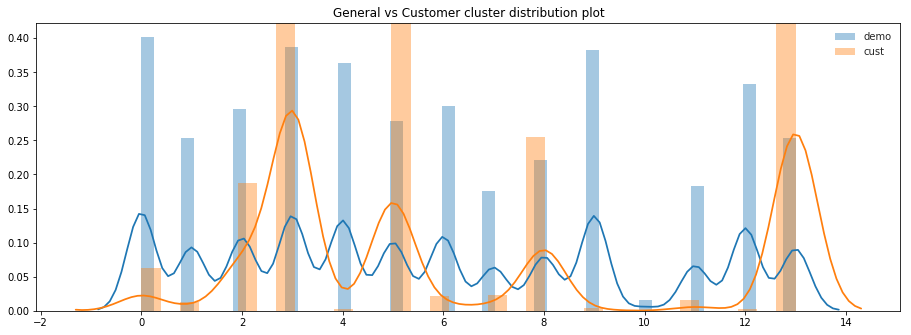

In [85]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

fig = plt.figure()
ax=fig.add_axes([0,0,2,1], title='General vs Customer cluster distribution plot')
sns.set(style="whitegrid")
sns.distplot(labels_general_14, label='demo',ax=ax)
sns.distplot(labels_customer_14, label='cust', ax=ax)
ax.legend();

In [86]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

cust_df = pd.DataFrame(labels_customer_14,columns=['Cluster']).reset_index().groupby('Cluster').count()/len(labels_customer_14)*100
pop_df = pd.DataFrame(labels_general_14,columns=['Cluster']).reset_index().groupby('Cluster').count()/len(labels_general_14)*100
diff = (cust_df-pop_df)
diff.rename_axis({'index':'DiffPerc'}, axis=1, inplace=True)
cust_df.rename_axis({'index':'CustPerc'}, axis=1, inplace=True)
pop_df.rename_axis({'index':'PopPerc'}, axis=1, inplace=True)
diff = diff.join(cust_df).join(pop_df).sort_values('DiffPerc',ascending=False)
diff.fillna(0, inplace=True)
diff

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  if __name__ == '__main__':


,DiffPerc,CustPerc,PopPerc
Cluster,,,
13,22.062709,28.633456,6.570747
3,21.417177,31.493484,10.076307
5,10.110951,17.366318,7.255367
8,3.987498,9.720987,5.733488
2,-0.539699,7.168072,7.707770
7,-3.688566,0.862032,4.550598
11,-4.169268,0.601516,4.770785
1,-6.081079,0.519620,6.600699
6,-6.962164,0.848618,7.810783


STUDENT COMMENT:
By comparing how general and customer populations are distributed by cluster, we can identify which ones are overrepresented and underrepresented in the customer data.
From the table above, as well as the distribution chart above, we can see that cluster 13 is the most overrepresented cluster in the customer database. Conversely, we can also see that cluster 9 is the most under represented. Further below, I provide a deeper explanation of what are the dominating characteristics/differences of people who belong to clusters 9 and 13.

In [87]:
cluster_specs = pd.DataFrame(scaler.inverse_transform(pca_40.inverse_transform(model_14.cluster_centers_)), columns=cust_clean_data.columns)
cluster_specs

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,GENERATION,MOVEMENT,CAMEO_INTL_2015_Social_class,CAMEO_INTL_2015_Life_stage
0,6.023687,2.031191,8.380981,2.651066,8.396093,3.272844,3.680292,6.648781,0.716522,3.475269,...,0.875610,6.985544,7.241450,5.647911,16.168081,6.796284,872.741199,0.722368,6.374027,8.013577
1,6.155245,1.990421,8.654958,2.584879,8.458871,3.185889,3.652422,6.164782,0.757155,3.387637,...,0.857343,6.958874,7.256033,5.724117,16.769377,6.883727,816.407554,0.763686,6.180996,8.110938
2,6.035308,1.958237,8.598167,2.746872,8.294705,3.325299,3.817122,6.114717,0.769659,3.479473,...,0.885973,7.016665,7.251649,5.645110,16.310306,6.998422,892.597493,0.775345,6.189108,7.824389
3,5.987919,1.935849,8.733044,2.511068,8.541888,3.071629,3.575648,6.359070,0.743433,3.521051,...,0.856116,7.000331,7.304769,5.635982,15.856296,6.996399,821.867832,0.748512,6.220133,7.962053
4,6.077260,1.966601,8.412720,2.678806,8.373227,3.290107,3.684154,6.633078,0.720765,3.414204,...,0.915341,7.006277,7.177653,5.677172,16.162916,6.957701,875.847949,0.726204,6.480906,7.638989
5,5.959394,1.854430,8.870763,2.674341,8.366062,3.197251,3.788005,5.762989,0.772067,3.502987,...,0.869429,6.935427,7.214144,5.539120,15.227319,6.980519,880.696966,0.776607,6.023468,7.924281
6,5.995562,1.966385,8.556607,2.826268,8.219551,3.439501,3.967831,6.080738,0.771447,3.499036,...,0.862617,7.003428,7.279559,5.655037,16.272225,7.029843,894.143825,0.777053,6.051738,7.618731
7,5.998041,1.996320,8.594731,2.606692,8.440984,3.176595,3.703502,6.216483,0.768142,3.472530,...,0.919192,7.046563,7.195185,5.829771,17.182866,7.279490,810.187806,0.774909,6.332358,7.984003
8,6.043544,2.022380,8.312177,2.523601,8.546100,3.113731,3.501155,7.007301,0.703754,3.510599,...,0.931411,7.059165,7.178037,5.810109,16.932736,7.253913,816.340470,0.709778,6.413024,7.841475
9,5.967002,1.943966,8.662591,2.559039,8.498475,3.182012,3.584767,6.425924,0.723463,3.510072,...,0.849828,6.979301,7.293783,5.661515,15.657479,6.946959,824.270117,0.728259,6.114587,7.739992


In [88]:
clust_cust = pd.concat([pd.DataFrame(new_df, columns = new_df.columns ), pd.DataFrame(labels_general_14, columns =["Cluster"])], axis = 1)
clust_cust

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,GENERATION,MOVEMENT,CAMEO_INTL_2015_Social_class,CAMEO_INTL_2015_Life_stage,Cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,5.0,4.0,3.0,5.0,4.0,90.0,0.0,5.0,1.0,13.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,4.0,4.0,3.0,5.0,2.0,90.0,1.0,2.0,4.0,8.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,3.0,4.0,2.0,3.0,3.0,70.0,0.0,1.0,2.0,4.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,3.0,3.0,4.0,6.0,5.0,70.0,0.0,4.0,3.0,9.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,5.0,5.0,2.0,3.0,3.0,50.0,0.0,5.0,4.0,9.0
6,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,0.0,2.0,...,5.0,5.0,4.0,6.0,3.0,80.0,0.0,2.0,2.0,6.0
7,1.0,1.0,3.0,3.0,4.0,1.0,3.0,2.0,0.0,1.0,...,4.0,4.0,2.0,5.0,2.0,70.0,0.0,1.0,4.0,5.0
8,3.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,3.0,...,3.0,3.0,2.0,4.0,3.0,80.0,1.0,1.0,3.0,13.0
9,3.0,2.0,2.0,4.0,2.0,3.0,5.0,4.0,1.0,2.0,...,3.0,3.0,2.0,3.0,1.0,90.0,1.0,1.0,5.0,12.0


In [89]:
clust_cust_modes = clust_cust.groupby(['Cluster'])
clust_cust_modes

In [90]:
clust_cust_modes.get_group(12).agg(lambda x:x.value_counts().index[0])

ALTERSKATEGORIE_GROB               3.0
ANREDE_KZ                          2.0
FINANZ_MINIMALIST                  3.0
FINANZ_SPARER                      1.0
FINANZ_VORSORGER                   5.0
FINANZ_ANLEGER                     1.0
FINANZ_UNAUFFAELLIGER              1.0
FINANZ_HAUSBAUER                   5.0
GREEN_AVANTGARDE                   0.0
HEALTH_TYP                         3.0
RETOURTYP_BK_S                     5.0
SEMIO_SOZ                          2.0
SEMIO_FAM                          2.0
SEMIO_REL                          4.0
SEMIO_MAT                          4.0
SEMIO_VERT                         2.0
SEMIO_LUST                         6.0
SEMIO_ERL                          4.0
SEMIO_KULT                         5.0
SEMIO_RAT                          4.0
SEMIO_KRIT                         5.0
SEMIO_DOM                          5.0
SEMIO_KAEM                         3.0
SEMIO_PFLICHT                      4.0
SEMIO_TRADV                        4.0
SOHO_KZ                  

In [91]:
clust_general = pd.concat([pd.DataFrame(cust_clean_data, columns = cust_clean_data.columns ), pd.DataFrame(labels_customer_14, columns =["Cluster"])], axis = 1)
clust_general

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,GENERATION,MOVEMENT,CAMEO_INTL_2015_Social_class,CAMEO_INTL_2015_Life_stage,Cluster
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,5.0,5.0,1.0,2.0,1.0,50.0,1.0,1.0,3.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,2.0,...,3.0,2.0,3.0,5.0,3.0,50.0,1.0,3.0,4.0,3.0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0.0,2.0,...,3.0,4.0,1.0,3.0,1.0,40.0,0.0,2.0,4.0,5.0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0.0,3.0,...,3.0,3.0,3.0,5.0,1.0,70.0,0.0,4.0,1.0,3.0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1.0,3.0,...,5.0,5.0,3.0,7.0,5.0,50.0,1.0,3.0,4.0,3.0
6,4.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,2.0,...,5.0,5.0,2.0,3.0,2.0,50.0,1.0,2.0,3.0,13.0
7,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,3.0,3.0,3.0,4.0,3.0,50.0,1.0,1.0,5.0,8.0
8,4.0,2.0,2.0,2.0,5.0,1.0,1.0,5.0,0.0,2.0,...,5.0,4.0,3.0,8.0,3.0,40.0,0.0,5.0,5.0,3.0
9,3.0,1.0,5.0,2.0,4.0,1.0,3.0,1.0,1.0,3.0,...,5.0,5.0,3.0,6.0,4.0,70.0,1.0,1.0,5.0,13.0


In [92]:
clust_general_modes = clust_general.groupby(['Cluster'])
clust_general_modes

In [97]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Student: From the General vs Customer distribution plot, it is clear that cluster 12 is the most OVERrepresented 
# population sample within the customer database. Let's take a look at it's most important features:
pd.set_option('display.max_rows', 65)
desired_traits = clust_general_modes.get_group(13).agg(lambda x:x.value_counts().index[0])



In [98]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# Student: From the General vs Customer distribution plot, it is clear that cluster 5 is the most UNDERrepresented 
# population sample within the customer database. Let's take a look at it's most important features:

undesired_traits = clust_general_modes.get_group(9).agg(lambda x:x.value_counts().index[0])


In [99]:
comparison = pd.concat([pd.DataFrame(desired_traits, columns=["desired traits"]), pd.DataFrame(undesired_traits, columns=["undesired traits"])], axis = 1)
comparison

,desired traits,undesired traits
ALTERSKATEGORIE_GROB,4.0,4.0
ANREDE_KZ,1.0,1.0
FINANZ_MINIMALIST,5.0,5.0
FINANZ_SPARER,1.0,1.0
FINANZ_VORSORGER,5.0,5.0
FINANZ_ANLEGER,1.0,1.0
FINANZ_UNAUFFAELLIGER,1.0,1.0
FINANZ_HAUSBAUER,2.0,2.0
GREEN_AVANTGARDE,0.0,1.0
HEALTH_TYP,2.0,2.0


In [100]:
# Most clusters differ in only a few of the measured features. That said, the most effective way to understand what
# are the characteristics of the portions of the general population that are either OVER- and UNDER-represented, it is
# useful to compare the main points where the OVER- and UNDER-represented differ. From the comparison table above, we see
# that the OVER- and UNDER- represented differ in the following features:

differences = comparison.loc[comparison["desired traits"] != comparison["undesired traits"]]
differences

,desired traits,undesired traits
GREEN_AVANTGARDE,0.0,1.0
SEMIO_DOM,3.0,5.0
SEMIO_PFLICHT,4.0,3.0
VERS_TYP,1.0,2.0
ANZ_PERSONEN,2.0,1.0
INNENSTADT,5.0,4.0
KKK,3.0,2.0
ONLINE_AFFINITAET,4.0,2.0
KBA13_ANZAHL_PKW,1400.0,552.0
ARBEIT,3.0,4.0


STUDENT ANSWER/COMMENT:
Upon consulting the Data Dictionary, the Over- and Under-represented in the customer database have the following
characteristics, respectfully (characteristics marked with an "*" seem to be the most relevant for the given exercise):

FEATURE: OVER-Represented / UNDER-Represented
*GREEN_AVANTGARDE: not a member of green avantgarde / member of green avantgarde
SEMIO_DOM (personality typology): high affinity / low affinity
SEMIO_PFLICHT (personality typology): average affinity / high affinity
VERS_TYP (Insurance typology): social-safety driven / individualistic-accepting risks
*ANZ_PERSONEN (Number of adults in household): 2 / 1
*INNENSTADT (Distance to city center (downtown)): 10 - 20 km to city center / 5 - 10 km to city center
KKK (Purchasing power in region): average / high
*ONLINE_AFFINITAET(Online affinity): Very high / middle
KBA13_ANZAHL_PKW (Number of cars in the PLZ8 region): 1400 / 668
ARBEIT (unemployment in neighborhood): average / high
MOVEMENT (Mainstream or avantgarde): Mainstream / Avantgarde
CAMEO_INTL_2015_Social_class (social class): Prosperous / Wealthy (ie one step richer than prosperous)

### Discussion 3.3: Compare Customer Data to Demographics Data

Please find answer in cell directly above

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.